![](images/2025-09-05-linear-vs-non-linear-transformation-relu.jpeg)

## Introduction

In deep learning, the difference between a linear layer and a non-linear layer is everything. The former can only stretch and rotate data, while the latter gives a network its true expressive power. The key to this power is the ReLU activation function.

This post provides a short, code-based visualization to make this concept crystal clear. Using a simple circle as our input data, we will demonstrate how a linear transformation preserves information, while the addition of ReLU creates complexity by strategically destroying it. Let's see what that looks like.

::: {.callout-tip title="Get the code" collapse="false"}

All the code can be found in the GitHub repository : [2025-09-05-linear-vs-non-linear-transformation-relu.ipynb](https://github.com/hassaanbinaslam/hassaanbinaslam.github.io/tree/main/posts/2025-09-05-linear-vs-non-linear-transformation-relu.ipynb).

:::

## Step 1: Creating Our Input Shape

First, let's create our input data—a simple "manifold." A circle is a perfect choice because it's a continuous shape that exists in all four quadrants of a 2D plane.

We'll use `NumPy` for the calculations and `Matplotlib` for plotting.

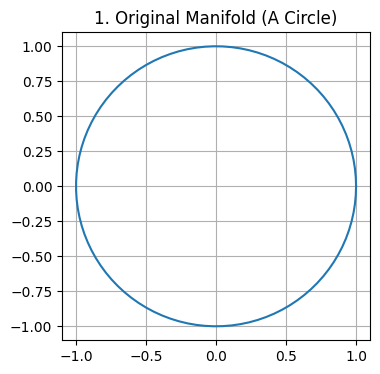

In [ ]:
# 1. Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt

# 2. Generate angles for the circle
#    To draw a circle, we need to calculate the (x, y) coordinates for a series of points along its circumference.
#    np.linspace(start, stop, num) is a handy function that creates an array of evenly spaced numbers over a specified interval.
#    - 'start' is 0 (0 radians).
#    - 'stop' is 2 * np.pi (360 degrees in radians), which completes a full circle.
#    - 'num' is 100, meaning we'll generate 100 points to make our circle look smooth.
theta = np.linspace(0, 2 * np.pi, 100)

# 3. Calculate the x and y coordinates
#    Now we use basic trigonometry to get the coordinates. For a unit circle (radius=1):
#    - The x-coordinate is the cosine of the angle.
#    - The y-coordinate is the sine of the angle.
#    np.vstack stacks arrays in sequence vertically (row wise).
#    - We create one array for all the x-coordinates: np.cos(theta).
#    - We create a second array for all the y-coordinates: np.sin(theta).
#    - vstack combines them into a single 2x100 array, where the first row is 'x' and the second is 'y'.
circle = np.vstack((np.cos(theta), np.sin(theta)))

# 4. Plot the original circle for visualization
#    This part is for drawing the graph so we can see our starting shape.

# Create a figure and axes for the plot. figsize controls the overall size.
plt.figure(figsize=(4, 4)) # A 4x4 figure makes a nice square plot
# The plot command takes the x-data and y-data.
# - circle[0, :] selects the first row (all x-coordinates).
# - circle[1, :] selects the second row (all y-coordinates).
plt.plot(circle[0, :], circle[1, :])
plt.title("1. Original Manifold (A Circle)")
# Add a grid for easier viewing.
plt.grid(True)
# This is a crucial line for plotting shapes. It forces the x and y axes to have the same scale.
# Without this, our circle might look like an oval just because of the window shape.
plt.gca().set_aspect('equal', adjustable='box')

# Display the final plot.
plt.show()

## Step 2: Applying a Linear Transformation

Next, we'll apply a purely linear transformation. This is what a `Conv2D` or `Dense` layer does *before* the activation function. A linear transformation can rotate, scale, and shear the data, but it cannot bend or break it.

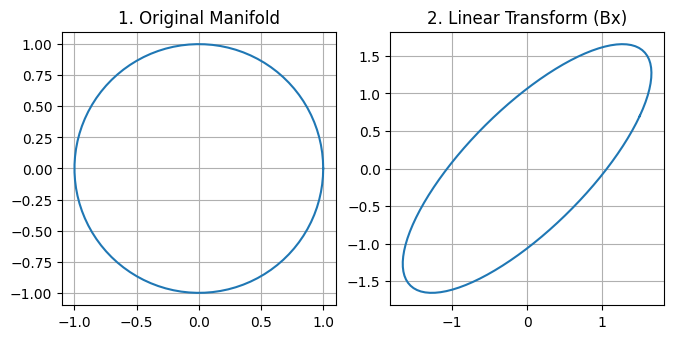

In [2]:
# 1. Define the transformation matrix B
#    This is a 2x2 matrix that will define how our 2D circle gets transformed.
#    - The diagonal elements (1.5, 1.5) will scale the circle, making it larger.
#    - The off-diagonal elements (0.7, 0.7) will introduce "shear," which skews the circle, turning it into an ellipse.
#    You can play with these numbers to see different effects!
B = np.array([
    [1.5, 0.7],
    [0.7, 1.5]
])

# 2. Apply the linear transformation
#    Here's where the math happens. The '@' symbol in Python/NumPy is the
#    operator for matrix multiplication.
#    - Our matrix B is of shape (2, 2).
#    - Our 'circle' data is of shape (2, 100), where we have 2 rows (x and y) and 100 points.
#    - The matrix multiplication B @ circle performs the transformation on all 100 points at once.
#    - The result, 'transformed_linear', will be a new (2, 100) array containing the coordinates of the new shape.
transformed_linear = B @ circle

# 3. Plot the result for visualization
#    This part is just for drawing the graph so we can see what happened.

# Create a figure to hold our plots, making it wide enough for a side-by-side comparison.
plt.figure(figsize=(12, 4))

# Create the first subplot for the original circle
plt.subplot(1, 3, 1)
# Plot the x-coordinates (first row) against the y-coordinates (second row) of the original circle
plt.plot(circle[0, :], circle[1, :])
plt.title("1. Original Manifold")
plt.grid(True)
# This important line ensures the x and y axes have the same scale, so the circle doesn't look like an ellipse due to plotting distortions.
plt.gca().set_aspect('equal', adjustable='box')

# Create the second subplot for the transformed shape
plt.subplot(1, 3, 2)
# Plot the x and y coordinates of our new, transformed shape
plt.plot(transformed_linear[0, :], transformed_linear[1, :])
plt.title("2. Linear Transform (Bx)")
plt.grid(True)
# Again, ensure the aspect ratio is equal to see the true shape.
plt.gca().set_aspect('equal', adjustable='box')

# Display the final plot
plt.show()

**Result:** The circle has been stretched and skewed into an ellipse. Critically, it's still a single, unbroken loop. This transformation is invertible; we could easily multiply by the inverse of `B` to get our original circle back. **No information has been lost.**


## Step 3: Applying the ReLU Non-Linearity

Now for the crucial part. We'll take that same ellipse and apply the Rectified Linear Unit (`ReLU`) function to it. ReLU is defined as `f(z) = max(0, z)`, meaning it clips all negative values to zero.

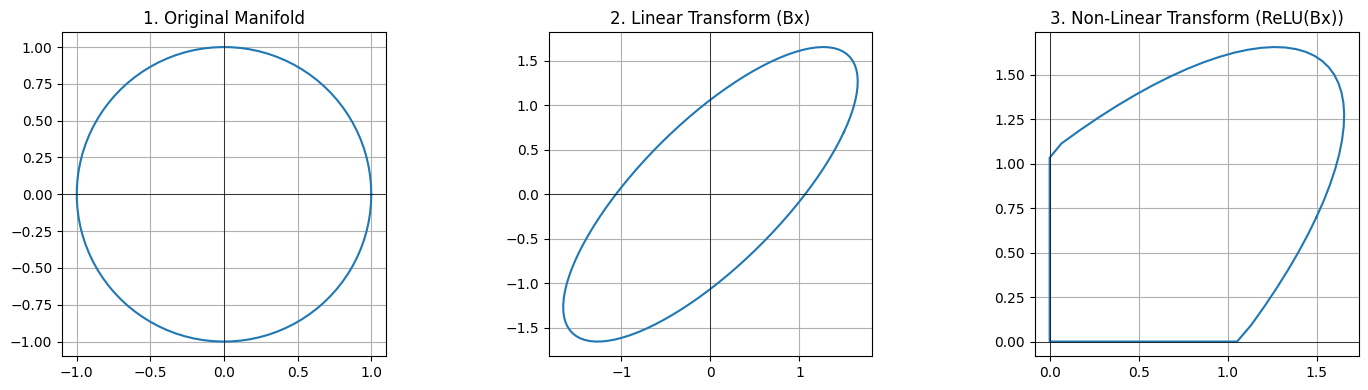

In [3]:
# 1. Apply the ReLU function
#    We will use NumPy's `maximum` function, which is a perfect implementation of ReLU.
#    It compares two arrays element-by-element and returns a new array containing the larger of the two values.
#    - `transformed_linear` is our 2x100 array of ellipse coordinates from Step 2.
#    - `0` is a single number. NumPy is smart enough to "broadcast" this 0,
#      meaning it compares every element in `transformed_linear` with 0.
#    - The result is a new 2x100 array, `transformed_nonlinear`, where any negative coordinate
#      has been replaced by 0.
transformed_nonlinear = np.maximum(0, transformed_linear)

# 2. Plot all three shapes for a side-by-side comparison
#    To really see the effect, we'll plot the original circle, the linear transformation,
#    and the final non-linear transformation all in one figure.

# Create a wide figure to hold three subplots.
plt.figure(figsize=(15, 4))

# --- Subplot 1: The Original Circle ---
plt.subplot(1, 3, 1)
plt.plot(circle[0, :], circle[1, :])
plt.title("1. Original Manifold")
# Add thin black lines for the x and y axes to make the quadrants clear.
plt.axhline(0, color='black', lw=0.5); plt.axvline(0, color='black', lw=0.5)
plt.grid(True)
plt.gca().set_aspect('equal', adjustable='box')

# --- Subplot 2: The Linear Transformation ---
plt.subplot(1, 3, 2)
plt.plot(transformed_linear[0, :], transformed_linear[1, :])
plt.title("2. Linear Transform (Bx)")
plt.axhline(0, color='black', lw=0.5); plt.axvline(0, color='black', lw=0.5)
plt.grid(True)
plt.gca().set_aspect('equal', adjustable='box')

# --- Subplot 3: The Non-Linear Transformation ---
plt.subplot(1, 3, 3)
plt.plot(transformed_nonlinear[0, :], transformed_nonlinear[1, :])
plt.title("3. Non-Linear Transform (ReLU(Bx))")
plt.axhline(0, color='black', lw=0.5); plt.axvline(0, color='black', lw=0.5)
plt.grid(True)
plt.gca().set_aspect('equal', adjustable='box')

# This command adjusts the spacing between plots to prevent titles from overlapping.
plt.tight_layout()
# Display the final, comprehensive plot.
plt.show()

**Result:** The smooth ellipse has been "cut and folded." Any part of the shape that was in the second, third, or fourth quadrants has been collapsed onto the positive axes or the origin. This transformation is **not invertible**. Looking at the final shape, you have no way of knowing what the original shape was. **Information has been permanently destroyed.**

## So, How Does Learning Happen in All This?

We've seen that `ReLU` is a fixed function that aggressively destroys information. This raises a profound question: if the network is constantly throwing information away, how can it possibly learn?

The answer is that **learning *is* the process of selectively destroying information.** A neural network's goal is not to preserve every detail of the input. Its goal is to transform the data into a new, simpler representation where the answer to a specific question becomes obvious. To do this, **it must learn to discard irrelevant details**.

This is a collaborative dance between the two parts of the layer:

### Step 1: The Linear Layer Learns to Aim

The linear part of the layer (`Bx`) is where the actual learning happens. The weights of this transformation are adjusted during training via backpropagation. Its job is to **aim** the data.

Imagine the `ReLU` function is a fixed cleaver that will chop off anything in the negative quadrants. The linear layer learns to perform the perfect rotation, stretching, and skewing of the input shape so that:

*   **Relevant information** (the signal) is carefully pushed into the first quadrant, where it will be safe from the `ReLU` cleaver.
*   **Irrelevant information** (the noise) is deliberately pushed into the second, third, and fourth quadrants, placing it directly in the "danger zone."

For a facial recognition task, the linear layer learns to rotate the data so that features defining a person's identity are aimed at the safe zone, while variations like lighting, shadows, and slight head tilts are aimed at the chopping block.

### Step 2: ReLU Acts as the Filter

The `ReLU` function is the non-learning, "dumb" part of the operation. It just executes its one simple rule: cut everything that isn't in the first quadrant.

Because the linear layer was so intelligent about aiming the data, this simple, fixed cut now becomes a highly sophisticated filtering operation. It cleanly removes the noise that the linear layer wanted to discard.

### The Result: Zooming In on What Matters

The outcome of this two-step process is a new representation of the data that is much more useful for the next layer in the network. This way we zoom and amplify the useful information for the upcoming layers to work on.

*   **Zoom:** By throwing away the irrelevant noise, the network is effectively "zooming in" on the features that actually matter for the task.
*   **Amplify:** The signal-to-noise ratio of the data is now much higher. The important features are amplified *relative* to the noise, which has been removed.

This makes the job for the next layer dramatically easier. It receives a pre-processed, cleaner representation, allowing it to focus on learning even more abstract patterns. This layer-by-layer process of aiming, cutting, and zooming is the very essence of how deep neural networks learn to understand the world.

## Conclusion

This simple experiment makes the theoretical concept tangible:

*   **Linear transformations** warp space but preserve the integrity and information of the data.
*   **Non-linear transformations (like ReLU)** create complexity and give neural networks their power, but this power comes directly from their ability to strategically "fold" space by destroying information.

Understanding this trade-off is key to modern neural network design. It's precisely why architectures like MobileNetV2 are so carefully designed, using non-linearities only in high-dimensional spaces where information loss is less catastrophic, while keeping their low-dimensional "bottlenecks" linear to protect the data.